# Set environment

In [ ]:
# # http://pytorch.org/
# from os.path import exists
# from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
# platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
# cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
# accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

# !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

In [ ]:
# !git clone https://github.com/gilbertolem/ProgGen

In [ ]:
# from os import chdir, getcwd
# chdir("ProgGen")
# from sys import path
# path.append(getcwd())

# Train

In [ ]:
import torch
import utils.data_tools as data_tools
from utils.nets import ProgGen_RNN, Weighted_Loss
from pickle import load, dump
import matplotlib.pyplot as plt

xml_directory = "XML_Tunes/"
torch.manual_seed(999)
use_gpu = torch.cuda.is_available()

In [2]:
# Load vocabulary
words_text2num = load(open("maps/words_text2num.txt",'rb'))
vocab_size = len(words_text2num)

# Create training data
filter_names = ['Charlie Parker']
filter_fracs = [1.0]
filter = {'names':filter_names, 'frac':filter_fracs}
Train, Val = data_tools.musicxml2tensor(xml_directory, words_text2num, filters = filters)
train_data = data_tools.TuneData(Train)
val_data = data_tools.TuneData(Val)


CREATING TENSORS FROM MUSICXML FILES...
	297 tunes succesfully loaded for training.
	75 tunes succesfully loaded for validation.


In [3]:
# Construct Neural Net
embed_size = 100
hidden_size = 256
num_layers = 1
dropout = 0
bidirectional = False
rnn_type = 'lstm'
model = ProgGen_RNN(rnn_type, vocab_size, embed_size, hidden_size, num_layers, dropout, bidirectional)
loss_fn = Weighted_Loss()

# Define loader
sampler = torch.utils.data.RandomSampler(train_data)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = 372, sampler = sampler, num_workers = 1 if use_gpu else 4)
val_loader = torch.utils.data.DataLoader(val_data, batch_size = 372, num_workers = 1 if use_gpu else 4)

if use_gpu:
    model = model.cuda()
    loss_fn = loss_fn.cuda()

In [4]:
# Define loss function and optimizer
lr = 1e-2
optim = torch.optim.Adam(model.parameters(), lr=lr)

In [5]:
from utils.training import train
epochs = 500
losses = train(epochs, model, optim, train_loader, val_loader, loss_fn, use_gpu)


--------------------------------------------------------------------
TRAINING MODEL... 

   Epoch | Training Loss | Val. Loss
       0 |          5.55 |      3.25
       1 |          3.53 |      3.17
       2 |          3.51 |      2.89
       3 |           3.1 |       2.9
       4 |          3.01 |      2.84
       5 |          2.95 |      2.69
       6 |          2.83 |      2.53
       7 |          2.71 |      2.42
       8 |          2.61 |      2.35
       9 |          2.52 |      2.28
      10 |          2.44 |      2.23
      11 |          2.36 |      2.18
      12 |          2.29 |      2.12
      13 |          2.21 |      2.06
      14 |          2.13 |       2.0
      15 |          2.05 |      1.95
      16 |          1.99 |       1.9
      17 |          1.93 |      1.86
      18 |          1.88 |      1.82
      19 |          1.84 |      1.79
      20 |           1.8 |      1.76
      21 |          1.77 |      1.74
      22 |          1.74 |      1.71
      23 |          1.

     218 |          0.93 |      1.64
     219 |          0.93 |      1.63
     220 |          0.95 |      1.69
     221 |          0.92 |      1.71
     222 |          0.93 |      1.69
     223 |          0.97 |      1.67
     224 |          0.93 |      1.68
     225 |          0.94 |      1.99
     226 |          0.94 |      1.68
     227 |          0.93 |      1.66
     228 |          0.92 |      1.66
     229 |          0.92 |      1.67
     230 |          0.94 |      1.68
     231 |          0.92 |      1.71
     232 |          0.93 |      1.75
     233 |          0.93 |      1.74
     234 |          0.92 |       1.7
     235 |          0.94 |      1.63
     236 |          0.92 |      1.63
     237 |          0.91 |      1.65
     238 |          0.92 |      1.69
     239 |          0.91 |      1.69
     240 |          0.91 |      1.67
     241 |          0.89 |      1.65
     242 |          0.91 |      1.68
     243 |           0.9 |      1.78
     244 |          0.92 |      1.68
 

     440 |          0.77 |      1.82
     441 |          0.75 |      1.81
     442 |          0.74 |       1.8
     443 |          0.72 |       1.8
     444 |          0.73 |      1.81
     445 |          0.75 |      1.81
     446 |          0.73 |      1.81
     447 |          0.74 |      1.81
     448 |          0.72 |      1.81
     449 |          0.75 |      1.81
     450 |          0.74 |      1.81
     451 |          0.72 |      1.83
     452 |          0.73 |      1.81
     453 |          0.78 |       1.8
     454 |          0.77 |      1.78
     455 |          0.73 |      1.79
     456 |          0.73 |      1.79
     457 |          0.73 |       1.8
     458 |          0.73 |       1.8
     459 |          0.72 |       1.8
     460 |          0.73 |      1.82
     461 |          0.73 |      1.86
     462 |          0.73 |      1.84
     463 |          0.72 |      1.83
     464 |          0.74 |      1.82
     465 |          0.72 |      1.81
     466 |           0.7 |       1.8
 

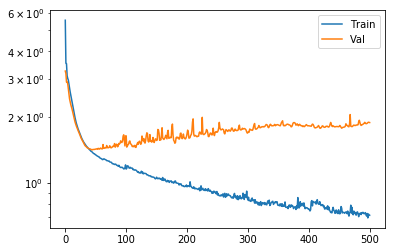

0.7090036869049072
1.8870422840118408
1.3828445672988892
1.4135241508483887


In [6]:
plt.semilogy(losses[0], label='Train')
plt.semilogy(losses[1], label='Val')
plt.legend()
plt.show()
import numpy as np
print(losses[0][-1])
print(losses[1][-1])
idx = np.argmin(losses[1])
print(losses[0][idx])
print(losses[1][idx])

# Generate something

In [ ]:
from utils.generating import generate_progression

model_name = "model"
initial_chord = "4C_maj"
tune_len = 32
top = 10

prog = generate_progression(initial_chord, tune_len, top, model_name, verbose = False)
print("Generated Progression:\n")
print(prog)